# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка

## Постановка задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка. 

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов. 

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Для начала импортируем библиотеки, которые нам понадобятся:

In [1]:
import numpy as np  # для матричных вычислений
import pandas as pd  # для анализа и предобработки данных
import matplotlib.pyplot as plt  # для визуализации
import seaborn as sns  # для визуализации
import plotly.express as px

from sklearn import linear_model  # линейные модели
from sklearn import metrics  # метрики
from sklearn import model_selection  # сплитование выборки
from sklearn import preprocessing  # предобработка данных
%matplotlib inline


Итак, прочитаем нашу таблицу:

In [2]:
churn_data = pd.read_csv('./data/churn.csv')
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


---

## Практика: логистическая регрессия

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9:

### Задание 5.0 (не оценивается)

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные. 

**Совет:** воспользуйтесь кодом, который вы писали, выполняя задания в модуле «PYTHON-13. Визуализация данных».

---

### Посмотрим на сбалансированность классов

Text(0.5, 1.0, 'Proportion of stayed/left clients')

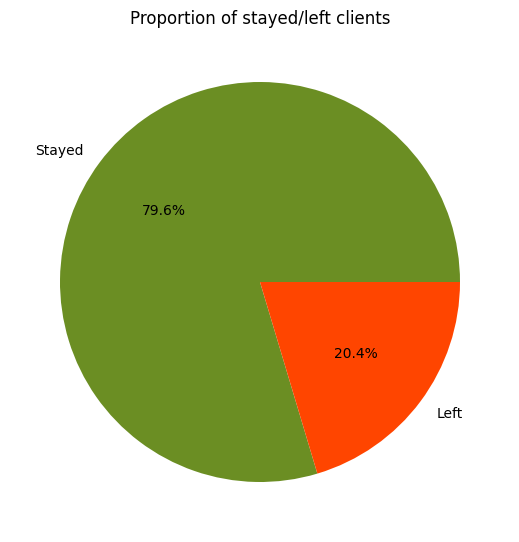

In [4]:
clients_proportion = churn_data.groupby('Exited')['CustomerId'].count()

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])
my_pal = {"Stayed": "dodgerblue", "Left": "darkorange"}
axes.pie(
    clients_proportion,
    labels=['Stayed', 'Left'],
    autopct='%.1f%%',
    explode=[0, 0],
    colors=['olivedrab', 'orangered']
)
axes.set_title('Proportion of stayed/left clients')


---

### Построим корреляционную матрицу

/var/folders/1_/hgb3xg852md0hqqs3ybwbsp40000gn/T/ipykernel_33859/2045771013.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=churn_data.corr().round(3), annot=True)


<AxesSubplot: >

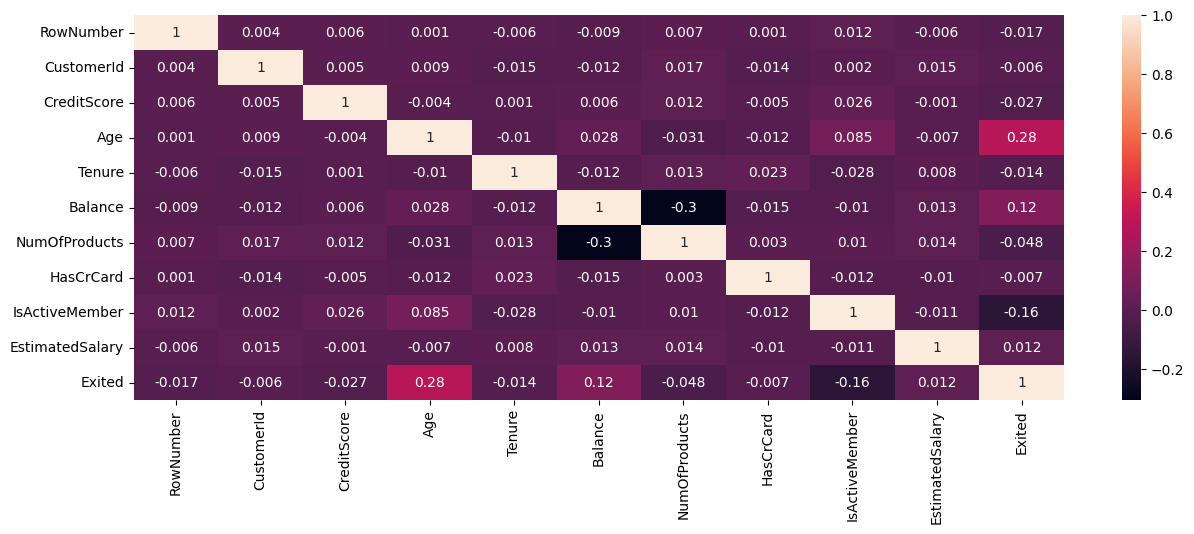

In [5]:
fig, ax = plt. subplots(figsize=(15, 5))
sns.heatmap(data=churn_data.corr().round(3), annot=True)


Мультиколлинеарность отсутсвует, наибольшее влияние на таргет имеет фит возраста

---

### Посмотрим распределение числовых признаков

In [6]:
numerical_col = [i for i in churn_data.columns if churn_data[i].dtype ==
                 'int64' or churn_data[i].dtype == 'float64']

removal_col = ['RowNumber', 'CustomerId',
               'HasCrCard', 'IsActiveMember', 'Exited',
               'Tenure', 'NumOfProducts']

for i in removal_col:
    numerical_col.remove(i)


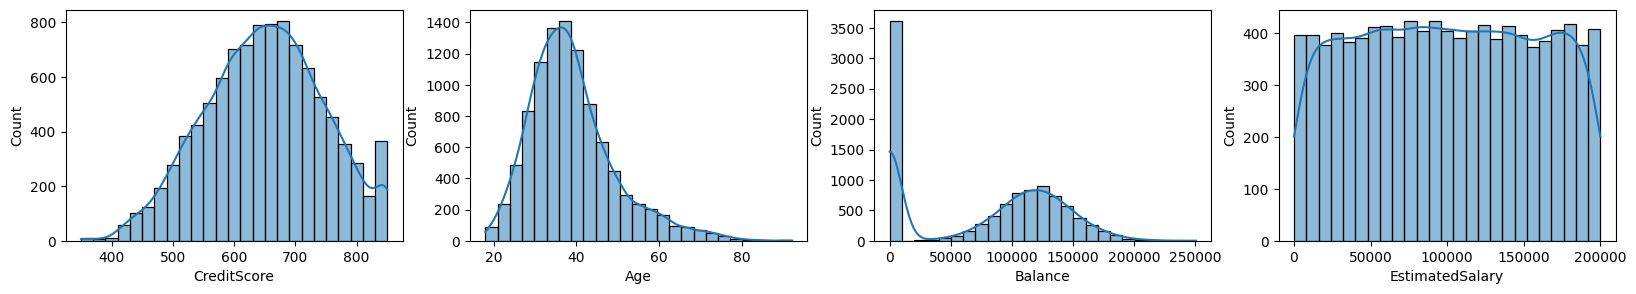

In [7]:
# Непрерывные признаки
fig, axes = plt.subplots(1, len(numerical_col), figsize=(20, 3))

for i, feature in enumerate(numerical_col):
    sns.histplot(
        data=churn_data,
        x=feature,
        bins=25,
        kde=True,
        ax=axes[i]
    )


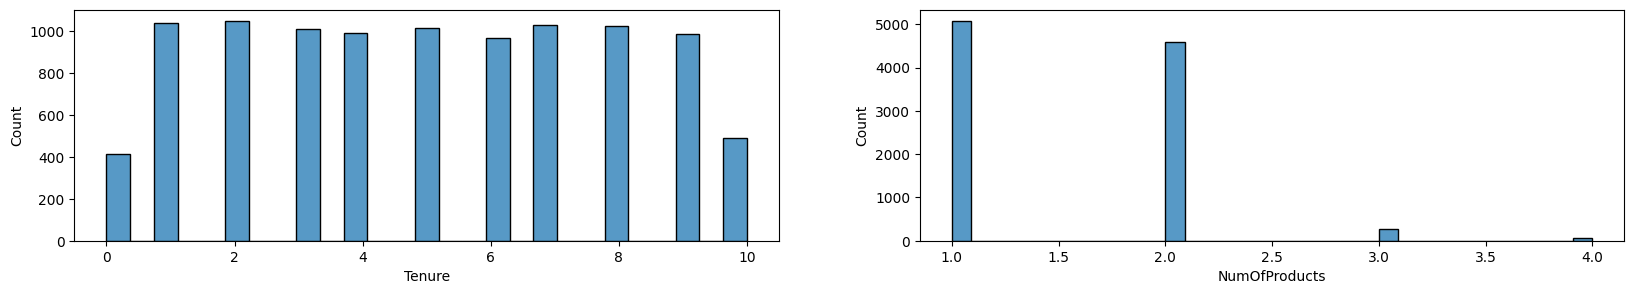

In [8]:
# Дискретные
discr_feat = ['Tenure', 'NumOfProducts']

fig, axes = plt.subplots(1, len(discr_feat), figsize=(20, 3))

for i, feat in enumerate(discr_feat):
    sns.histplot(
        data=churn_data,
        x=feat,
        ax=axes[i]
    )


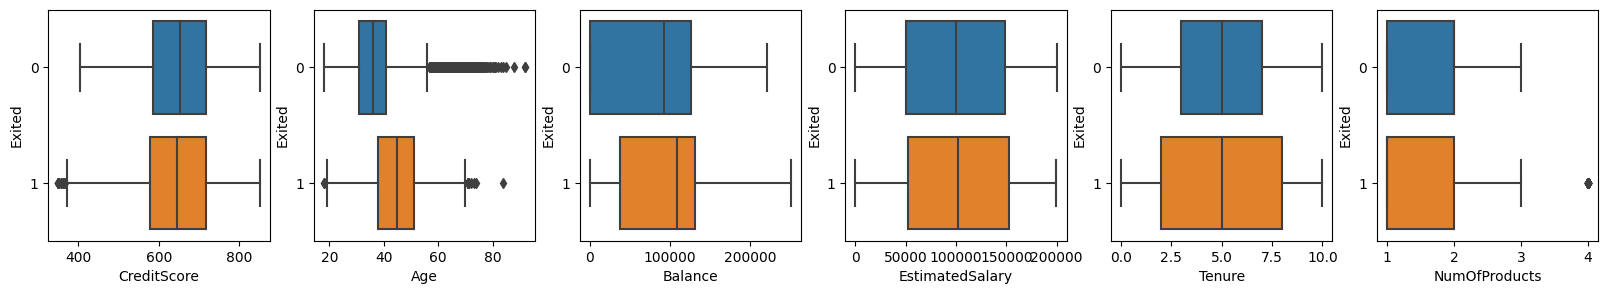

In [9]:
# Посмотрим на выбросы
numerical_col += discr_feat

fig, axes = plt.subplots(1, len(numerical_col), figsize=(20, 3))

for i, feat in enumerate(numerical_col):
    sns.boxplot(
        data=churn_data,
        x=feat,
        y="Exited",
        orient='h',
        ax=axes[i]
    )


---

### Распределение ушедших клиентов по странам

Text(0, 0.5, 'Amount of clients')

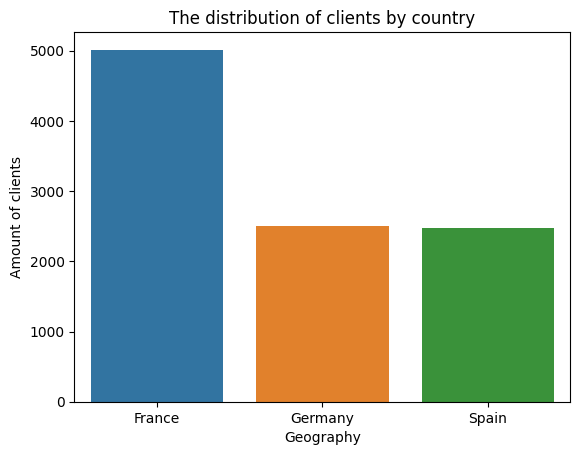

In [10]:
country_sum = churn_data.groupby(by='Geography', as_index=False)[
    'CustomerId'].nunique()

barplot_country = sns.barplot(
    data=country_sum,
    x='Geography',
    y='CustomerId',
)
barplot_country.set_title('The distribution of clients by country')
barplot_country.set_ylabel('Amount of clients')


---

В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

---

In [11]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape


(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [12]:
churn_data = churn_data.drop(
    ['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


Проверим, что в наших данных нет пропусков:

In [13]:
churn_data.isnull().sum()


CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим, что в наших данных нет дубликатов:

In [14]:
churn_data[churn_data.duplicated()].sum()


CreditScore        0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

### Задание 5.1 (1 балл)

Давайте сделаем предобработку данных. 

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания указанных в задании признаков;
    * приведён код для кодирования категориальных признаков в числовые бинарные столбцы;
    * приведён код для расчёта основных статистических характеристик полученных признаков.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [15]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance'] / \
    churn_data['EstimatedSalary']

churn_data['TenureByAge'] = churn_data['Tenure'] / churn_data['Age']

churn_data['CreditScoreGivenAge'] = churn_data['CreditScore'] / \
    churn_data['Age']

churn_data['Gender'] = churn_data['Gender'].apply(
    lambda x: 1 if x == 'Male' else 0)

churn_data.describe()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000
mean,651.453567,0.524512,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432,9.024870,0.134303,17.526487
std,98.168937,0.499498,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256,214.286020,0.087680,5.349558
min,350.000000,0.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000,0.192582,0.000000,6.112676
25%,584.000000,0.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000,0.783284,0.060606,13.686275
50%,651.000000,1.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000,1.197220,0.125000,16.857143
75%,722.000000,1.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000,2.400083,0.200000,20.852941
max,850.000000,1.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000,10614.655440,0.500000,46.388889


Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [16]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]


Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [17]:
y.value_counts(normalize=True)


0    0.675568
1    0.324432
Name: Exited, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    stratify=y,
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))


Train shape: (1881, 12)
Test shape: (628, 12)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [19]:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))


Train :


0    0.675704
1    0.324296
Name: Exited, dtype: float64



Test :


0    0.675159
1    0.324841
Name: Exited, dtype: float64

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

---

### Задание 5.2 (1 балл)

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания одного из вариантов скейлеров для масштабирования данных;
    * приведён код для расчёта параметров трансформации (обучение скейлера) на тренировочной выборке;
    * приведён код для трансформации тренировочных и тестовых данных (признаков) в соответствии с вычисленными параметрами.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [20]:
scaller = preprocessing.StandardScaler()
scaller.fit(X_train)

X_train_scaled = scaller.transform(X_train)
X_test_scaled = scaller.transform(X_test)


Теперь переходим к моделированию.

---

### Задание 5.3 (1 балл)

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


> Ответ: *Выбираем F1- меру, как баланс между precision  и recall, т.е. баланс между ошикбками 1 и 2 рода.*

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * выбрана верная метрика;
    * приведено развернутое обоснование выбора метрики, и приведенные рассуждения являются верными;

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

> Ответ: *Так как по условиям задачи наши ресурсы ограничены, мы должны уменьшать вероятность ложно-положительных ответов (ошибки первого рода) т.е. сократить трату ресурсов на удержание клиентов которые не собирались уйти, при этом нам не менее важно сократить отток клиентов и не "промахиваться" с определением класса клиентов собирающихся уйти (ложно-отрицательный ответ или ощибка второго рода), в данном случае мы будем использовать **F1- меру** как средне-гормоническое precision/recall, метрика при расчете которой, мы можем избежать сценария заземления вероятности одной из ошибок*.

---

### Задание 5.4 (2 балла)

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

> **Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель логистической регрессии, решающая поставленную задачу;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [21]:
# Произведем базовое моделирование на нескалированных признаках
log_reg_model_base = linear_model.LogisticRegression(
    random_state=42, max_iter=1000)
log_reg_model_base.fit(X_train, y_train)

y_train_pred = log_reg_model_base.predict(X_train)
y_test_pred = log_reg_model_base.predict(X_test)

print(f'Test f1: {metrics.f1_score(y_train, y_train_pred).round(2)}')
print(f'Test f1: {metrics.f1_score(y_test, y_test_pred).round(2)}\n')


print('Train', metrics.classification_report(y_train, y_train_pred))
print('Test', metrics.classification_report(y_test, y_test_pred))


Test f1: 0.35
Test f1: 0.38

Train               precision    recall  f1-score   support

           0       0.72      0.92      0.80      1271
           1       0.59      0.25      0.35       610

    accuracy                           0.70      1881
   macro avg       0.65      0.58      0.58      1881
weighted avg       0.68      0.70      0.66      1881

Test               precision    recall  f1-score   support

           0       0.72      0.90      0.80       424
           1       0.58      0.28      0.38       204

    accuracy                           0.70       628
   macro avg       0.65      0.59      0.59       628
weighted avg       0.68      0.70      0.66       628



In [22]:
# Произведем базовое моделирование с применением скалированных данных
log_reg_model_base = linear_model.LogisticRegression(
    random_state=42, max_iter=1000)
log_reg_model_base.fit(X_train_scaled, y_train)

y_train_pred = log_reg_model_base.predict(X_train_scaled)
y_test_pred = log_reg_model_base.predict(X_test_scaled)

print(f'Test f1: {metrics.f1_score(y_train, y_train_pred).round(2)}')
print(f'Test f1: {metrics.f1_score(y_test, y_test_pred).round(2)}\n')


print('Train', metrics.classification_report(y_train, y_train_pred))
print('Test', metrics.classification_report(y_test, y_test_pred))


Test f1: 0.51
Test f1: 0.49

Train               precision    recall  f1-score   support

           0       0.76      0.88      0.82      1271
           1       0.63      0.43      0.51       610

    accuracy                           0.73      1881
   macro avg       0.70      0.65      0.66      1881
weighted avg       0.72      0.73      0.72      1881

Test               precision    recall  f1-score   support

           0       0.76      0.86      0.81       424
           1       0.60      0.42      0.49       204

    accuracy                           0.72       628
   macro avg       0.68      0.64      0.65       628
weighted avg       0.70      0.72      0.70       628



> Ваши выводы и рассуждения — *Тестовая и тренировачные выборки, на определении класса 1 (уходящие/ушедшие) по f1 показывает неудовлетворительные результаты, что говорит о недообученности модели, дополнительно я использовал функцию classification report, чтобы посмотреть на точность 0 класса, как и предполагалось, из-за несбалансированности выборки и мажоритарности 0 класса, модель гораздо лучше показывает себя на его определении. Попытка прогнать проскалированные данные дает прирост целевой метрики, но ее показатели все равно не достаточны для утверждения тезиса об эффективности модели*.

In [23]:
# Произведем моделирование c пробегом по коэффициенту С в диапазоне от 1 до 10 и L2 регуляризацией
for i in range(1, 11):
    log_reg_model_base = linear_model.LogisticRegression(
        random_state=42, max_iter=1000, C=i)
    log_reg_model_base.fit(X_train_scaled, y_train)

    y_train_pred = log_reg_model_base.predict(X_train_scaled)
    y_test_pred = log_reg_model_base.predict(X_test_scaled)

    print(
        f'Test f1: {metrics.f1_score(y_train, y_train_pred).round(2)}, C={i}')
    print(
        f'Test f1: {metrics.f1_score(y_test, y_test_pred).round(2)}, , C={i}\n')


Test f1: 0.51, C=1
Test f1: 0.49, , C=1

Test f1: 0.51, C=2
Test f1: 0.49, , C=2

Test f1: 0.51, C=3
Test f1: 0.49, , C=3

Test f1: 0.52, C=4
Test f1: 0.49, , C=4

Test f1: 0.52, C=5
Test f1: 0.49, , C=5

Test f1: 0.52, C=6
Test f1: 0.49, , C=6

Test f1: 0.52, C=7
Test f1: 0.49, , C=7

Test f1: 0.52, C=8
Test f1: 0.49, , C=8

Test f1: 0.52, C=9
Test f1: 0.49, , C=9

Test f1: 0.52, C=10
Test f1: 0.49, , C=10



In [24]:
# Произведем моделирование c пробегом по коэффициенту С в диапазоне от 1 до 10 и L1 регуляризацией
for i in range(1, 11):
    log_reg_model_base = linear_model.LogisticRegression(
        penalty="l1", solver='liblinear', random_state=42, max_iter=1000, C=i)
    log_reg_model_base.fit(X_train_scaled, y_train)

    y_train_pred = log_reg_model_base.predict(X_train_scaled)
    y_test_pred = log_reg_model_base.predict(X_test_scaled)

    print(
        f'Test f1: {metrics.f1_score(y_train, y_train_pred).round(2)}, C={i}')
    print(
        f'Test f1: {metrics.f1_score(y_test, y_test_pred).round(2)}, , C={i}\n')


Test f1: 0.52, C=1
Test f1: 0.49, , C=1

Test f1: 0.52, C=2
Test f1: 0.5, , C=2

Test f1: 0.52, C=3
Test f1: 0.49, , C=3

Test f1: 0.52, C=4
Test f1: 0.49, , C=4

Test f1: 0.52, C=5
Test f1: 0.49, , C=5

Test f1: 0.52, C=6
Test f1: 0.49, , C=6

Test f1: 0.52, C=7
Test f1: 0.49, , C=7

Test f1: 0.52, C=8
Test f1: 0.49, , C=8

Test f1: 0.52, C=9
Test f1: 0.49, , C=9

Test f1: 0.52, C=10
Test f1: 0.49, , C=10



> *Как можно заметить перебор гиперпараметров не дает существенных результатов в приросте метрики, стоит отметить что в данных прогонах исопльзовались проскалированные данные как показавшие лучший результат в предыдущих экспериментах*

---

### Задание 5.5 (2 балла)

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * сгенерированы полиномиальные признаки третьей степени;
    * построена модель логистической регрессии, решающая поставленную задачу на основе сгенерированных признаков;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [25]:
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

log_mod_poly = linear_model.LogisticRegression(random_state=42, max_iter=1000)
log_mod_poly.fit(X_train_scaled_poly, y_train)

y_train_poly_pred = log_mod_poly.predict(X_train_scaled_poly)
y_test_poly_pred = log_mod_poly.predict(X_test_scaled_poly)

print(f'Test f1: {metrics.f1_score(y_train, y_train_poly_pred).round(2)}')
print(f'Test f1: {metrics.f1_score(y_test, y_test_poly_pred).round(2)}\n')


print('Train', metrics.classification_report(y_train, y_train_poly_pred))
print('Test', metrics.classification_report(y_test, y_test_poly_pred))


Test f1: 0.77
Test f1: 0.64

Train               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1271
           1       0.82      0.73      0.77       610

    accuracy                           0.86      1881
   macro avg       0.85      0.83      0.84      1881
weighted avg       0.86      0.86      0.86      1881

Test               precision    recall  f1-score   support

           0       0.82      0.87      0.84       424
           1       0.69      0.60      0.64       204

    accuracy                           0.78       628
   macro avg       0.75      0.74      0.74       628
weighted avg       0.78      0.78      0.78       628



> Ваши выводы и рассуждения — *Как можно заметить, мы плюс-минус удвоили результат по целевой метрике на тестовой (что для нас важнее) и тренировочных выборках, что хорошо, но не достаточно, попробуем поиграться с гиперпараметрами, а так же со степенью полинома *

In [26]:
poly_c_degree = [i for i in range(2, 7)]

for i in poly_c_degree:
    poly = preprocessing.PolynomialFeatures(degree=i, include_bias=False)
    poly.fit(X_train_scaled)

    X_train_scaled_poly = poly.transform(X_train_scaled)
    X_test_scaled_poly = poly.transform(X_test_scaled)

    log_mod_poly = linear_model.LogisticRegression(
        random_state=42, C=i, max_iter=10000)
    log_mod_poly.fit(X_train_scaled_poly, y_train)

    y_train_poly_pred = log_mod_poly.predict(X_train_scaled_poly)
    y_test_poly_pred = log_mod_poly.predict(X_test_scaled_poly)

    print(
        f'Test f1: {metrics.f1_score(y_train, y_train_poly_pred).round(2)} for degree {i}')
    print(
        f'Test f1: {metrics.f1_score(y_test, y_test_poly_pred).round(2)} for degree {i}\n')


Test f1: 0.71 for degree 2
Test f1: 0.68 for degree 2

Test f1: 0.78 for degree 3
Test f1: 0.62 for degree 3

Test f1: 0.96 for degree 4
Test f1: 0.51 for degree 4

Test f1: 1.0 for degree 5
Test f1: 0.56 for degree 5

Test f1: 1.0 for degree 6
Test f1: 0.55 for degree 6



> *При параллельном увеличении параметров С и степени полинома идет уменьшение целевой метрики, попробуем поиграть только со степенью полинома*

In [27]:
poly_c_degree = [i for i in range(2, 7)]

for i in poly_c_degree:
    poly = preprocessing.PolynomialFeatures(degree=i, include_bias=False)
    poly.fit(X_train_scaled)

    X_train_scaled_poly = poly.transform(X_train_scaled)
    X_test_scaled_poly = poly.transform(X_test_scaled)

    log_mod_poly = linear_model.LogisticRegression(
        random_state=42, max_iter=5000)
    log_mod_poly.fit(X_train_scaled_poly, y_train)

    y_train_poly_pred = log_mod_poly.predict(X_train_scaled_poly)
    y_test_poly_pred = log_mod_poly.predict(X_test_scaled_poly)

    print(
        f'Test f1: {metrics.f1_score(y_train, y_train_poly_pred).round(2)} for degree {i}')
    print(
        f'Test f1: {metrics.f1_score(y_test, y_test_poly_pred).round(2)} for degree {i}\n')


Test f1: 0.71 for degree 2
Test f1: 0.68 for degree 2

Test f1: 0.77 for degree 3
Test f1: 0.64 for degree 3

Test f1: 0.92 for degree 4
Test f1: 0.52 for degree 4

Test f1: 1.0 for degree 5
Test f1: 0.56 for degree 5

Test f1: 1.0 for degree 6
Test f1: 0.55 for degree 6



> *Идентичная ситуация, нужно отметить что параметр С не имел влияния на  нашу модель, теперь проверим с l1 регялризацией и сделаем выводы.*

In [28]:
poly_c_degree = [i for i in range(2, 7)]

for i in poly_c_degree:
    poly = preprocessing.PolynomialFeatures(degree=i, include_bias=False)
    poly.fit(X_train_scaled)

    X_train_scaled_poly = poly.transform(X_train_scaled)
    X_test_scaled_poly = poly.transform(X_test_scaled)

    log_mod_poly = linear_model.LogisticRegression(
        penalty="l1", solver='liblinear',
        random_state=42, max_iter=5000)
    log_mod_poly.fit(X_train_scaled_poly, y_train)

    y_train_poly_pred = log_mod_poly.predict(X_train_scaled_poly)
    y_test_poly_pred = log_mod_poly.predict(X_test_scaled_poly)

    print(
        f'Test f1: {metrics.f1_score(y_train, y_train_poly_pred).round(2)} for degree {i}')
    print(
        f'Test f1: {metrics.f1_score(y_test, y_test_poly_pred).round(2)} for degree {i}\n')


Test f1: 0.71 for degree 2
Test f1: 0.69 for degree 2

Test f1: 0.77 for degree 3
Test f1: 0.65 for degree 3

Test f1: 0.88 for degree 4
Test f1: 0.54 for degree 4

Test f1: 0.97 for degree 5
Test f1: 0.57 for degree 5

Test f1: 0.98 for degree 6
Test f1: 0.57 for degree 6



> *Штош наилучший результат на данный момент показала l1 регуляризация с использованием полиномиальных признаков степени 2, при таком подходе мы получили f1 равный 0.69 на тестовой выборке, тут нужно отметить, что увеличение показателя тестовой метрики более приритетно, ввиду симуляции предсказания на неизвестных данных*

---

### Задание 5.6. (2 балла)


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для построения графика зависимости значения выбранной метрики от порога вероятности;
    * найден оптимальный порог вероятности, на котором достигается наибольшее значение выбранной метрики на тестовой выборке;
    * на основе найденного порога вероятности построено предсказание модели для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

При значении порога вероятности равной 0.3, достигается максимум функции f1 равная 0.7027


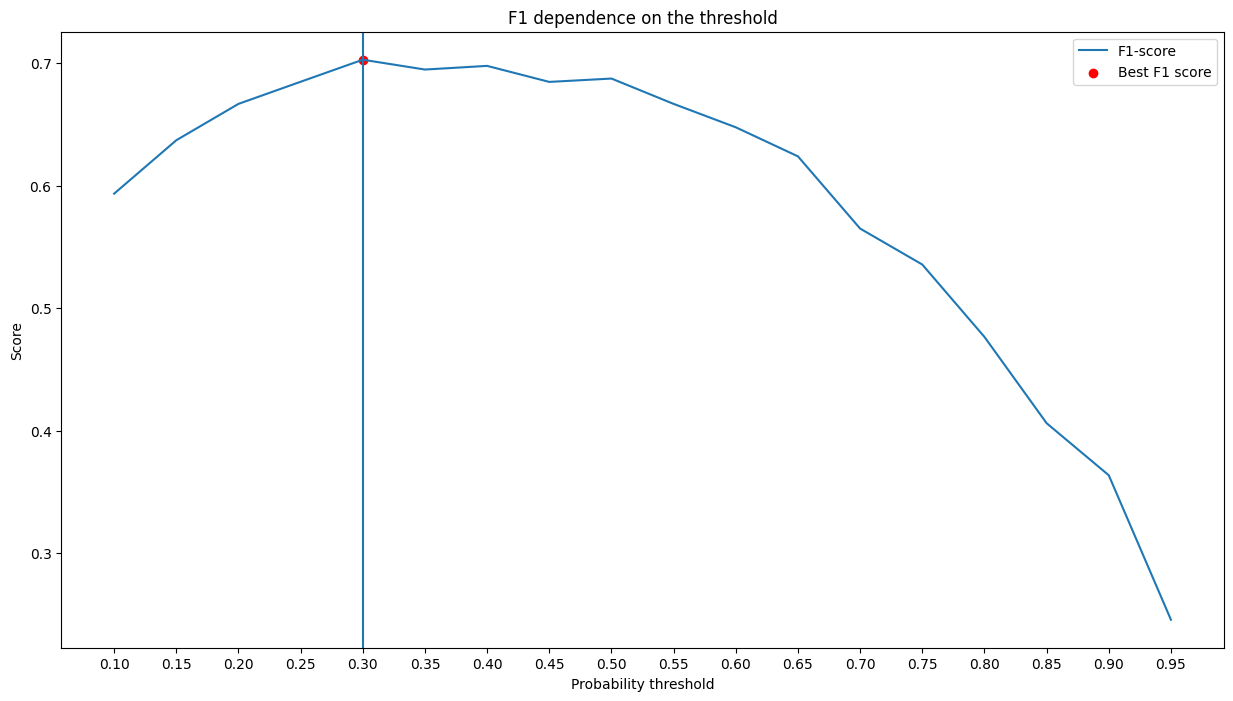

In [29]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

log_mod_poly = linear_model.LogisticRegression(
    penalty="l1", solver='liblinear',
    random_state=42, max_iter=5000)
log_mod_poly.fit(X_train_scaled_poly, y_train)

y_train_proba_pred = pd.Series(
    log_mod_poly.predict_proba(X_train_scaled_poly)[:, 1])

y_test_proba_pred = pd.Series(
    log_mod_poly.predict_proba(X_test_scaled_poly)[:, 1])


thresholds = np.arange(0.1, 1, 0.05)
test_scores = []

for threshold in thresholds:
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    test_scores.append(metrics.f1_score(y_test, y_test_pred))

idx = np.argmax(test_scores)
print(
    f'При значении порога вероятности равной {thresholds[idx].round(2)}, достигается максимум функции f1 равная {test_scores[idx].round(4)}')

fig, axes = plt.subplots(figsize=(15, 8))
axes.plot(thresholds, test_scores, label='F1-score')
axes.scatter(
    thresholds[idx], test_scores[idx],
    marker='o', color='red', label='Best F1 score')
axes.axvline(thresholds[idx])
axes.set_title('F1 dependence on the threshold')
axes.set_xlabel('Probability threshold')
axes.set_ylabel('Score')
# Устанавливаем отметки по оси x
axes.set_xticks(thresholds)
# Отображаем легенду
axes.legend()


In [30]:
# Испольщуем найденый оптимум порога вероятности
opt_prob_thresh = 0.3

y_train_proba_pred_opt = y_train_proba_pred.apply(
    lambda x: 1 if x > opt_prob_thresh else 0)

y_test_proba_pred_opt = y_test_proba_pred.apply(
    lambda x: 1 if x > opt_prob_thresh else 0)

print(
    f'Train f1 with opt thresh {metrics.f1_score(y_train, y_train_proba_pred_opt).round(3)}')
print(
    f'Test f1 with opt thresh {metrics.f1_score(y_test, y_test_proba_pred_opt).round(3)}')


Train f1 with opt thresh 0.711
Test f1 with opt thresh 0.703


> При применении оптимального порога вероятности на полиномиальных признаках логистической регрессии с L1 регуляризацией мы смогли выдавить из модели показатель метрики f1 равной 0.71 и 0.70 для тренировочной и тестовой выборок соответсвенно. Нужно отметить, что примененные шаги имели куммулятивный, но все же предельный эффект, по меньшей мере на предоставленных фитах.

---

## Практика: деревья решений и случайный лес

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [31]:
# Реинициализируем датасет, так как заблоговременно не стали работать в копии
churn_data = pd.read_csv('./data/churn.csv')

churn_data = churn_data[churn_data['Geography'] == 'Germany']

churn_data = churn_data.drop(
    ['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)


churn_data['BalanceSalaryRatio'] = churn_data['Balance'] / \
    churn_data['EstimatedSalary']

churn_data['TenureByAge'] = churn_data['Tenure'] / churn_data['Age']

churn_data['CreditScoreGivenAge'] = churn_data['CreditScore'] / \
    churn_data['Age']

churn_data['Gender'] = churn_data['Gender'].apply(
    lambda x: 1 if x == 'Male' else 0)

X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]


In [32]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    stratify=y,
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))


Train shape: (1881, 12)
Test shape: (628, 12)


Импортируем необходимые для выполнения практики модули:

In [2]:
from sklearn import tree
from sklearn import ensemble


Приступим! Выполните задания 8.1–8.4.

---

### Задание 8.1. (2 балла)

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос, а также обоснование полученного результата.

- Задание выполнено верно, но не приведено обоснование полученного результата или обоснование является некорректным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [34]:
# Base tree
base_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
base_tree.fit(X_train, y_train)

y_train_pred = base_tree.predict(X_train)
y_test_pred = base_tree.predict(X_test)

print(f'Train f1 metric = {metrics.f1_score(y_train, y_train_pred).round(2)}')
print(f'Test f1 metric = {metrics.f1_score(y_test, y_test_pred).round(2)}\n')

print(f'Train {metrics.classification_report(y_train, y_train_pred)}')
print(f'Test {metrics.classification_report(y_test, y_test_pred)}')


Train f1 metric = 1.0
Test f1 metric = 0.57

Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881

Test               precision    recall  f1-score   support

           0       0.79      0.82      0.80       424
           1       0.59      0.55      0.57       204

    accuracy                           0.73       628
   macro avg       0.69      0.68      0.69       628
weighted avg       0.72      0.73      0.73       628



> Ваши выводы и рассуждения — *Модель переобучена, это видно на полном репорте особенно отчетливо, она научилась предсказывать класс с точностью в сто процентов на тренировочной выборке, но чистота предсказаний на тестовой показывает, что она не способна давать предсказаний на новых данных*

---

### Задание 8.2. (1 балл)

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [35]:
trimmed_tree = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=8,
    min_samples_leaf=10, random_state=42
)

trimmed_tree.fit(X_train, y_train)

y_train_pred = trimmed_tree.predict(X_train)
y_test_pred = trimmed_tree.predict(X_test)

print(f'Train f1 metric = {metrics.f1_score(y_train, y_train_pred).round(2)}')
print(f'Test f1 metric = {metrics.f1_score(y_test, y_test_pred).round(2)}\n')

print(f'Train {metrics.classification_report(y_train, y_train_pred)}')
print(f'Test {metrics.classification_report(y_test, y_test_pred)}')


Train f1 metric = 0.72
Test f1 metric = 0.64

Train               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1271
           1       0.80      0.65      0.72       610

    accuracy                           0.83      1881
   macro avg       0.82      0.79      0.80      1881
weighted avg       0.83      0.83      0.83      1881

Test               precision    recall  f1-score   support

           0       0.82      0.88      0.85       424
           1       0.71      0.58      0.64       204

    accuracy                           0.79       628
   macro avg       0.76      0.73      0.74       628
weighted avg       0.78      0.79      0.78       628



> Ваши выводы и рассуждения — *С вводом измененных гаперпараметров, нам удалось увеличить показатель на тестовой выборке, снизив при этом значение на тренировочной, т.е. снизив разброс модели.*

---

### Задание 8.3. (1 балл)

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [36]:
forest_model = ensemble.RandomForestClassifier(
    criterion='entropy', n_estimators=500, max_depth=8, min_samples_leaf=10, random_state=42)

forest_model.fit(X_train, y_train)

y_train_pred = forest_model.predict(X_train)
y_test_pred = forest_model.predict(X_test)

print(f'Train f1 metric = {metrics.f1_score(y_train, y_train_pred).round(2)}')
print(f'Test f1 metric = {metrics.f1_score(y_test, y_test_pred).round(2)}\n')

print(f'Train {metrics.classification_report(y_train, y_train_pred)}')
print(f'Test {metrics.classification_report(y_test, y_test_pred)}')


Train f1 metric = 0.74
Test f1 metric = 0.66

Train               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1271
           1       0.86      0.64      0.74       610

    accuracy                           0.85      1881
   macro avg       0.85      0.80      0.82      1881
weighted avg       0.85      0.85      0.84      1881

Test               precision    recall  f1-score   support

           0       0.82      0.91      0.86       424
           1       0.75      0.58      0.66       204

    accuracy                           0.80       628
   macro avg       0.78      0.74      0.76       628
weighted avg       0.80      0.80      0.79       628



In [37]:
# Попробуем поиграть с параметрами модели, и посмотреть даст ли это какой-то результат, будем провать сначала глубину,
# затем с минимальным количеством объектов для формирования листа.

depth_level = [2, 4, 6, 8, 10, 12]
for level in depth_level:
    forest_model = ensemble.RandomForestClassifier(
        criterion='entropy', n_estimators=500, max_depth=level, min_samples_leaf=10, random_state=42)

    forest_model.fit(X_train, y_train)

    y_train_pred = forest_model.predict(X_train)
    y_test_pred = forest_model.predict(X_test)

    print(
        f'Train f1 metric = {metrics.f1_score(y_train, y_train_pred).round(2)} for depth_level = {level}')
    print(
        f'Test f1 metric = {metrics.f1_score(y_test, y_test_pred).round(2)} for depth_level = {level}\n')


Train f1 metric = 0.47 for depth_level = 2
Test f1 metric = 0.47 for depth_level = 2

Train f1 metric = 0.66 for depth_level = 4
Test f1 metric = 0.64 for depth_level = 4

Train f1 metric = 0.71 for depth_level = 6
Test f1 metric = 0.66 for depth_level = 6

Train f1 metric = 0.74 for depth_level = 8
Test f1 metric = 0.66 for depth_level = 8

Train f1 metric = 0.75 for depth_level = 10
Test f1 metric = 0.66 for depth_level = 10

Train f1 metric = 0.77 for depth_level = 12
Test f1 metric = 0.65 for depth_level = 12



> Оставим глубину на 8, так как дальнейшее увеличение параметра, не приводит к улучшению ситуации и начинает даже снижать эффект

In [38]:
leafs_obj = [i for i in range(1, 11)]
for leaf in leafs_obj:
    forest_model = ensemble.RandomForestClassifier(
        criterion='entropy', n_estimators=500, max_depth=8, min_samples_leaf=leaf, random_state=42)

    forest_model.fit(X_train, y_train)

    y_train_pred = forest_model.predict(X_train)
    y_test_pred = forest_model.predict(X_test)

    print(
        f'Train f1 metric = {metrics.f1_score(y_train, y_train_pred).round(2)} for depth_level = {leaf}')
    print(
        f'Test f1 metric = {metrics.f1_score(y_test, y_test_pred).round(2)} for depth_level = {leaf}\n')


Train f1 metric = 0.77 for depth_level = 1
Test f1 metric = 0.65 for depth_level = 1

Train f1 metric = 0.77 for depth_level = 2
Test f1 metric = 0.65 for depth_level = 2

Train f1 metric = 0.76 for depth_level = 3
Test f1 metric = 0.66 for depth_level = 3

Train f1 metric = 0.75 for depth_level = 4
Test f1 metric = 0.66 for depth_level = 4

Train f1 metric = 0.74 for depth_level = 5
Test f1 metric = 0.65 for depth_level = 5

Train f1 metric = 0.74 for depth_level = 6
Test f1 metric = 0.66 for depth_level = 6

Train f1 metric = 0.74 for depth_level = 7
Test f1 metric = 0.66 for depth_level = 7

Train f1 metric = 0.74 for depth_level = 8
Test f1 metric = 0.66 for depth_level = 8

Train f1 metric = 0.74 for depth_level = 9
Test f1 metric = 0.65 for depth_level = 9

Train f1 metric = 0.74 for depth_level = 10
Test f1 metric = 0.66 for depth_level = 10



> Параметр объектов в листе то же не дал особых результатов

> Ваши выводы и рассуждения — *За счет использования ансамбля мы смогли еще немного повысить точность предсказания относительно одиночного дерева, что говорит о его победе в на этом этапе, но все же все еще хуже чем логистическая регрессия в которой значение f-меры на тестовой выборке составило 0.7 против 0.66 в ансамбле*

---

### Задание 8.4. (2 балла)

Мы на финишной прямой. 


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список. 

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

> **Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

При значении порога вероятности равной 0.3, достигается максимум функции f1 равная 0.767


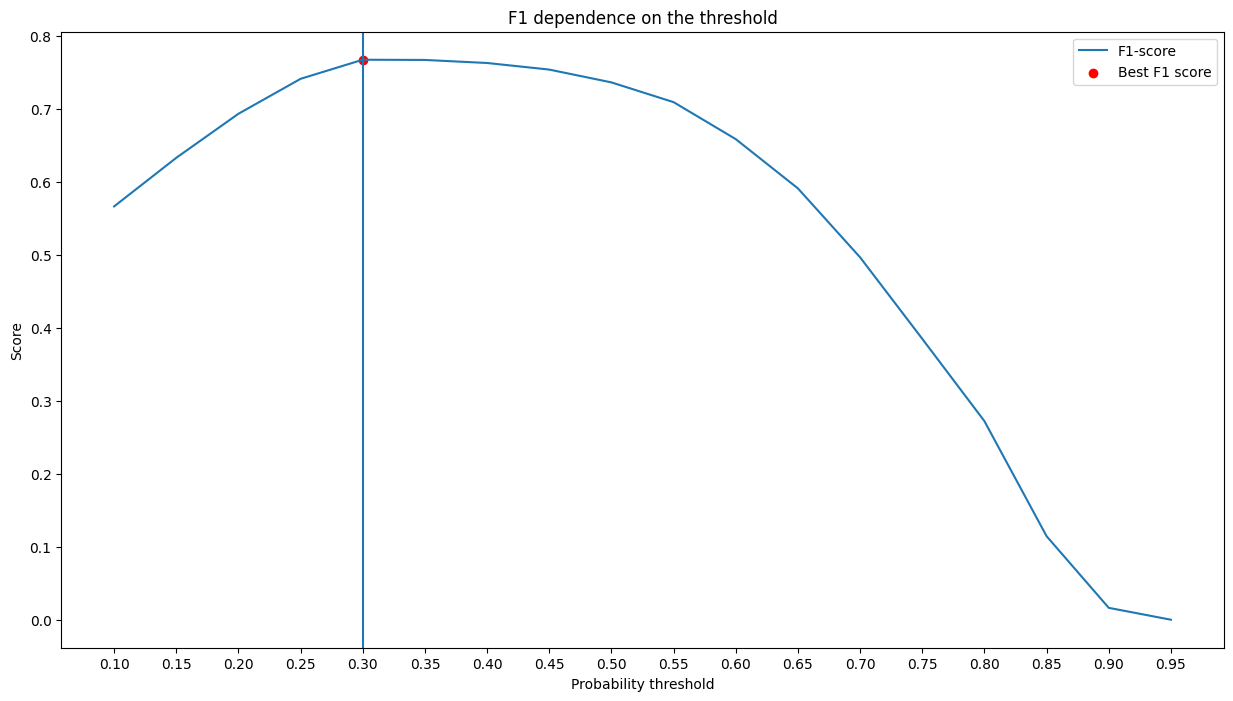

In [39]:
thresholds = np.arange(0.1, 1, 0.05)
scores = []

forest_model = ensemble.RandomForestClassifier(
    criterion='entropy', n_estimators=500, max_depth=8, min_samples_leaf=10, random_state=42)

forest_model.fit(X_train, y_train)

y_train_proba_pred = pd.Series(forest_model.predict_proba(X_train)[:, 1])
y_test_proba_pred = pd.Series(forest_model.predict_proba(X_test)[:, 1])

for threshold in thresholds:
    y_train_pred = y_train_proba_pred.apply(
        lambda x: 1 if x > threshold else 0)
    scores.append(metrics.f1_score(y_train, y_train_pred))

idx = np.argmax(scores)
print(
    f'При значении порога вероятности равной {thresholds[idx].round(2)}, достигается максимум функции f1 равная {scores[idx].round(4)}')

fig, axes = plt.subplots(figsize=(15, 8))
axes.plot(thresholds, scores, label='F1-score')
axes.scatter(
    thresholds[idx], scores[idx],
    marker='o', color='red', label='Best F1 score')
axes.axvline(thresholds[idx])
axes.set_title('F1 dependence on the threshold')
axes.set_xlabel('Probability threshold')
axes.set_ylabel('Score')
# Устанавливаем отметки по оси x
axes.set_xticks(thresholds)
# Отображаем легенду
axes.legend();


In [40]:
# Используем найденый оптимум порога вероятности
opt_prob_thresh = 0.3

y_train_proba_pred_opt = y_train_proba_pred.apply(
    lambda x: 1 if x > opt_prob_thresh else 0)

y_test_proba_pred_opt = y_test_proba_pred.apply(
    lambda x: 1 if x > opt_prob_thresh else 0)

print(
    f'Train f1 with opt thresh {metrics.f1_score(y_train, y_train_proba_pred_opt).round(3)}')
print(
    f'Test f1 with opt thresh {metrics.f1_score(y_test, y_test_proba_pred_opt).round(3)}')

Train f1 with opt thresh 0.767
Test f1 with opt thresh 0.678


> Ваши выводы и рассуждения — *Мы подобрали оптимальное *

---

### Задание 8.5. (1 балл)

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

> **Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * сформирован DataFrame на основе предоставленного словаря;
    * произведены преобразования данных, необходимые для работы модели;
    * предсказана вероятность оттока клиента (вероятность принадлежности к классу 1).

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [3]:
# Реинициализируем датасет для чистого эффекта
churn_data = pd.read_csv('./data/churn.csv')

churn_data = churn_data[churn_data['Geography'] == 'Germany']

churn_data = churn_data.drop(
    ['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)


churn_data['BalanceSalaryRatio'] = churn_data['Balance'] / \
    churn_data['EstimatedSalary']

churn_data['TenureByAge'] = churn_data['Tenure'] / churn_data['Age']

churn_data['CreditScoreGivenAge'] = churn_data['CreditScore'] / \
    churn_data['Age']

churn_data['Gender'] = churn_data['Gender'].apply(
    lambda x: 1 if x == 'Male' else 0)

churn_data['set_old'] = 1 # присвоим класс датасета 1-старый 0-новый, понадобится

In [4]:
# Добавим Василия и переведем его в строку датафрейма
vasiliy = {
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}

new_row = pd.DataFrame(vasiliy)

new_row['BalanceSalaryRatio'] = new_row['Balance'] / \
    new_row['EstimatedSalary']

new_row['TenureByAge'] = new_row['Tenure'] / new_row['Age']

new_row['CreditScoreGivenAge'] = new_row['CreditScore'] / \
    new_row['Age']

new_row['Gender'] = new_row['Gender'].apply(
    lambda x: 1 if x == 'Male' else 0)

new_row['set_old'] = 0

In [6]:
# Смержим датасет для обучения и строку с новым КА для трансформации фитов одним блоком



{'CreditScore': [601.0],
 'Gender': ['Male'],
 'Age': [42.0],
 'Tenure': [1.0],
 'Balance': [98495.72],
 'NumOfProducts': [1.0],
 'HasCrCard': [1.0],
 'IsActiveMember': [0.0],
 'EstimatedSalary': [40014.76],
 'set_old': 1}

In [ ]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    stratify=y,
    random_state=0

> #### Исходя из проведенного исследования, в нашем случае наилучший результат показала полиномиальная логистическая регрессия с L1 регуляризацией

In [48]:
# Произведем скалирование признаков, включая информацию для Василия
scaller = preprocessing.StandardScaler()
scaller.fit(X_train)

X_train_scaled = scaller.transform(X_train)
X_test_scaled = scaller.transform(X_test)
X_new_scaled = scaller.transform(new_row)


In [49]:
# Создадим полиномиальные ризнаки
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

# Добавим их к нашей  информации
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
X_new_scaled_poly = poly.transform(X_new_scaled)

# Произведем моделирование
log_mod_poly = linear_model.LogisticRegression(
    penalty="l1", solver='liblinear',
    random_state=42, max_iter=5000)
log_mod_poly.fit(X_train_scaled_poly, y_train)

# Рассчитаем вероятности классов
y_train_proba_pred = pd.Series(
    log_mod_poly.predict_proba(X_train_scaled_poly)[:, 1])

y_test_proba_pred = pd.Series(
    log_mod_poly.predict_proba(X_test_scaled_poly)[:, 1])

y_new_proba_pred = pd.Series(
    log_mod_poly.predict_proba(X_new_scaled_poly)[:, 1])

# Найдем оптимальный порог вероятности при которой f1- метрика имеет наибольшее значение на валидационной выборке
thresholds = np.arange(0.1, 1, 0.05)
test_scores = []

for threshold in thresholds:
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    test_scores.append(metrics.f1_score(y_test, y_test_pred))

idx = np.argmax(test_scores)

# Используя пороговое значение назначим класс объектам в зависимости от их положения относительно его
opt_prob_thresh = thresholds[idx]

y_train_proba_pred_opt = y_train_proba_pred.apply(
    lambda x: 1 if x > opt_prob_thresh else 0)

y_test_proba_pred_opt = y_test_proba_pred.apply(
    lambda x: 1 if x > opt_prob_thresh else 0)

y_new_proba_pred_opt = y_new_proba_pred.apply(
    lambda x: 1 if x > opt_prob_thresh else 0)

print(
    f'Train f1 with opt thresh {metrics.f1_score(y_train, y_train_proba_pred_opt).round(3)}')
print(
    f'Test f1 with opt thresh {metrics.f1_score(y_test, y_test_proba_pred_opt).round(3)}')
print(f'Predicted class for new info: {y_new_proba_pred_opt[0]}')


Train f1 with opt thresh 0.711
Test f1 with opt thresh 0.703
Predicted class for new info: 1


> #### По данным предсказания модели Василий принадлежит к 1 классу, т.е. собирается отказываться от услуг банка. Хоть модель и показала лучший результат чем ансамбль, я решил прогнать еще и через него, просто что бы убедиться.

In [50]:
thresholds = np.arange(0.1, 1, 0.05)
scores = []

forest_model = ensemble.RandomForestClassifier(
    criterion='entropy', n_estimators=500, max_depth=8, min_samples_leaf=10, random_state=42)

forest_model.fit(X_train, y_train)

y_train_proba_pred = pd.Series(forest_model.predict_proba(X_train)[:, 1])
y_test_proba_pred = pd.Series(forest_model.predict_proba(X_test)[:, 1])
new_proba_pred = pd.Series(forest_model.predict_proba(new_row)[:, 1])

for threshold in thresholds:
    y_train_pred = y_train_proba_pred.apply(
        lambda x: 1 if x > threshold else 0)
    scores.append(metrics.f1_score(y_train, y_train_pred))

idx = np.argmax(scores)

# Испольщуем найденый оптимум порога вероятности
opt_prob_thresh = thresholds[idx]

y_train_proba_pred_opt = y_train_proba_pred.apply(
    lambda x: 1 if x > opt_prob_thresh else 0)

y_test_proba_pred_opt = y_test_proba_pred.apply(
    lambda x: 1 if x > opt_prob_thresh else 0)

new_proba_pred_opt = new_proba_pred.apply(
    lambda x: 1 if x > opt_prob_thresh else 0)

print(
    f'Train f1 with opt thresh {metrics.f1_score(y_train, y_train_proba_pred_opt).round(3)}')
print(
    f'Test f1 with opt thresh {metrics.f1_score(y_test, y_test_proba_pred_opt).round(3)}')
print(f'Predicted class for new info: {new_proba_pred_opt[0]}')


Train f1 with opt thresh 0.767
Test f1 with opt thresh 0.678
Predicted class for new info: 1


> #### Теперь я спокоен, две модели предсказали один и тот же класс, при том нужно учитывать что одна строила гиперплоскость, а другая шла по дереву решений в лесу подобных деревьев, т.е. мы использовали инкапсулированнные подходы, что дает большую уверенность (не знаю корректно ли делать такой прогон из ансамбля и сторонней модели, но по логике я применил гипер-ансамбль) и обе модели имеют приемлимую метрику по техзаданию - попасть в диапазон 0.6- 0.7 по тестовой выборке.